<h1 align="center"><b>Predicting Heart Disease Using Machine Learning Algorithms</b></h1>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV is used for hyperparameter tuning, performing a grid search with cross-validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA # PCA is used for dimensionality reduction
from sklearn.naive_bayes import GaussianNB # GaussianNB is a Naive Bayes classifier for Gaussian-distributed data
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier is an ensemble method that combines the predictions of several base estimators to improve robustness over a single estimator
from sklearn.preprocessing import StandardScaler # StandardScaler is used to standardize features by removing the mean and scaling to unit variance

## Dataset

The dataset utilized for this project is the [HEART DISEASE DATASET (COMPREHENSIVE)](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive "HEART DISEASE DATASET (COMPREHENSIVE) from IEEE Dataport") from IEEE Dataport.

This dataset is a comprehensive amalgamation of five well-known heart disease datasets that were previously available independently but not combined. The integration of these datasets over 11 common features makes it the most extensive heart disease dataset currently available for research purposes. The five datasets included in this compilation are:

1. Cleveland
2. Hungarian
3. Switzerland
4. Long Beach VA
5. Statlog (Heart) Data Set

The dataset comprises 1190 instances with 11 features each. The aggregation of these datasets aims to support the advancement of research on coronary artery disease (CAD) related machine learning and data mining algorithms, thereby enhancing clinical diagnosis and promoting early treatment interventions.


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the Dataset
PATH = "/content/drive/MyDrive/Colab Notebooks/heart_statlog_cleveland_hungary_final.csv"
patient_data = pd.read_csv(PATH)
patient_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Examine Dataset

In [4]:
patient_data.shape  # Gives (rows, columns) for the dataset

(1190, 12)

In [5]:
patient_data.isnull().sum()  # Check for missing values

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [6]:
patient_data.isna().any().sum()  # Check for NaN values

0

Therefore, by performing these analyses, we can conclude that the dataset is comprehensive and well-structured, providing a robust foundation for developing and evaluating machine learning models aimed at predicting heart disease.

In [7]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


From summary statistics of the heart disease dataset, we can infer several important insights that could be useful for further analysis.
#### Age
    Mean Age: 53.72 years - Most patients are middle-aged
    Range: 28 to 77 years - Patients span a wide age range, indicating that heart disease affects a broad age group.
    Distribution: 50% of patients are between 47 and 60 years old (IQR).
    This suggests that heart disease is more prevalent in individuals nearing or in their middle age.
*Implications: Middle-aged individuals are at a higher risk of heart disease. Preventive measures and regular health check-ups are crucial for this age group to identify and manage heart disease early.*

#### Sex
    Proportion: 76.39% male - The dataset has a higher proportion of male patients.
*Implications: Heart disease appears more prevalent in males within this dataset. Gender-specific risk factors and symptoms should be considered in diagnosis and treatment plans.*

#### Resting Blood Pressure
    The average resting blood pressure is 132.15 mmHg, with some patients having very high values.
*Implications: Elevated blood pressure is a significant risk factor for heart disease.*

####  Cholesterol
    The mean cholesterol level is 210.36 mg/dL, which is above the desirable level.
*Implications: High cholesterol levels are a major risk factor for heart disease. Regular monitoring and management of cholesterol through diet, exercise, and medication are essential.*

#### Fasting Blood Sugar
    21.34% of patients have fasting blood sugar levels > 120 mg/dL.
*Implications: High fasting blood sugar indicates potential diabetes or prediabetes, both of which are risk factors for heart disease. Monitoring and controlling blood sugar levels are critical.*

#### Exercise-Induced Angina
    38.74% of patients experience angina during exercise.
*Implications: Exercise-induced angina is a sign of ischemia and underlying heart disease. Patients experiencing angina should undergo further diagnostic testing.*


Based on the analysis of the heart disease dataset, several critical factors have been identified that significantly impact the risk and management of heart disease. Understanding these factors and their implications can guide preventive measures, early diagnosis, and effective treatment strategies.


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

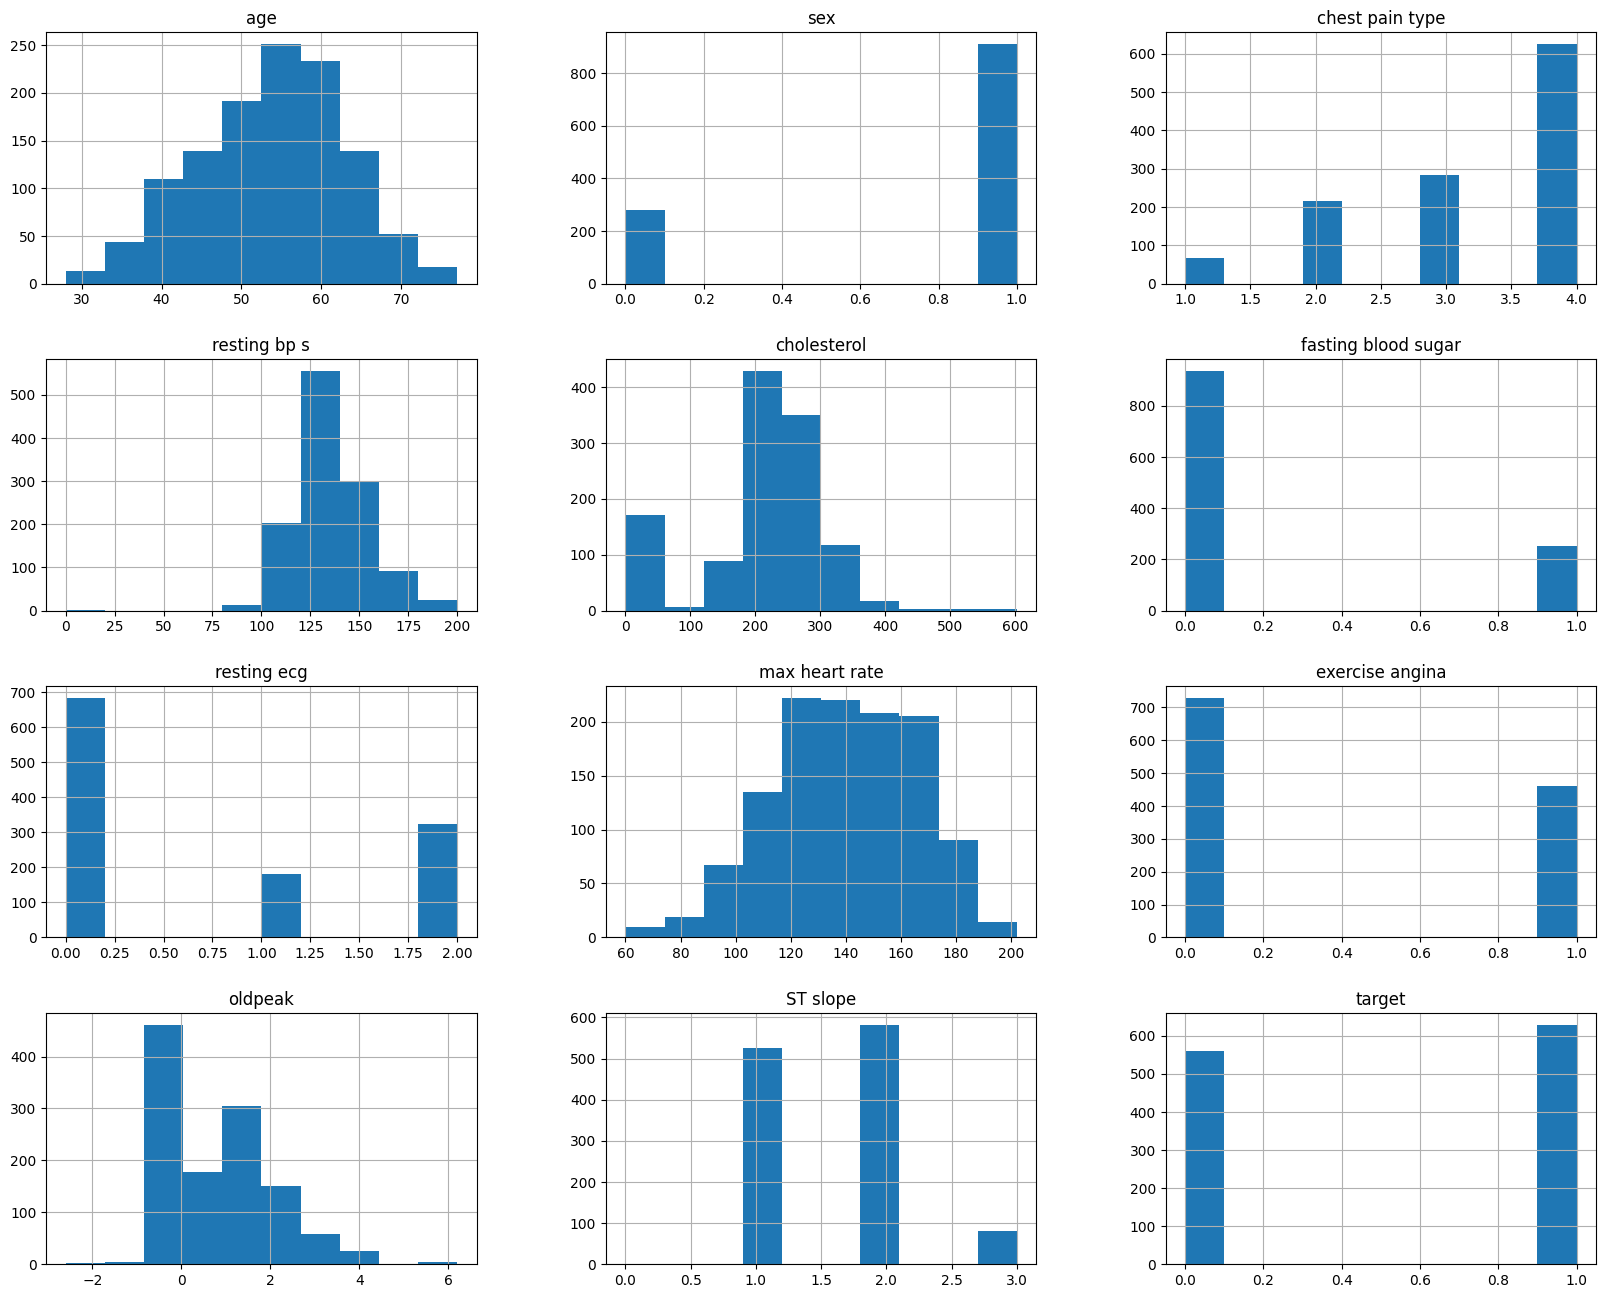

In [8]:
patient_data.hist(figsize=(20, 16))

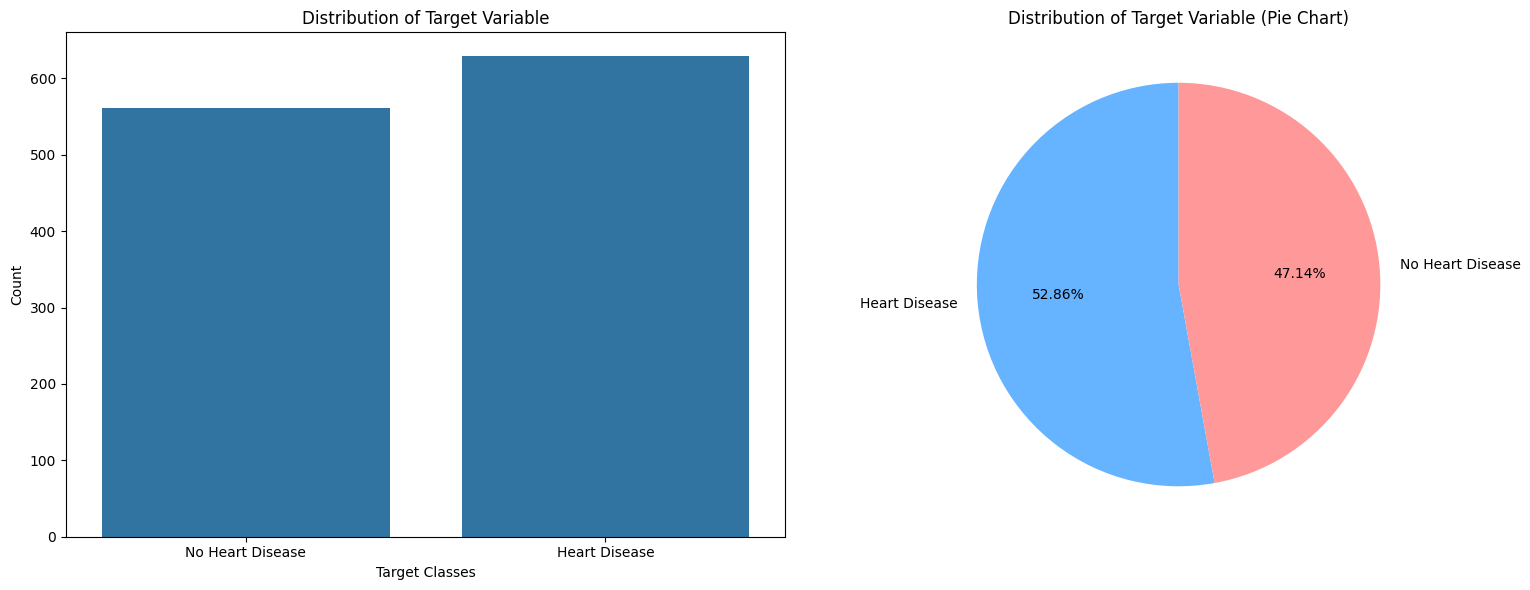

In [9]:
new_patient_data = pd.read_csv(PATH)
class_label_mapping = {0: "No Heart Disease", 1: "Heart Disease"}
new_patient_data["target_class"] = new_patient_data["target"].map(class_label_mapping)

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create figure with 1 row and 2 columns with the specified size

# Count plot on the first subplot
sns.countplot(
    x="target_class", data=new_patient_data, order=["No Heart Disease", "Heart Disease"], ax=axes[0]
)
axes[0].set_title("Distribution of Target Variable")
axes[0].set_xlabel("Target Classes")
axes[0].set_ylabel("Count")

# Pie chart on the second subplot
target_counts = new_patient_data["target_class"].value_counts()
axes[1].pie(
    target_counts,
    labels=target_counts.index,
    autopct='%0.2f%%',
    startangle=90,
    colors=["#66b3ff", "#ff9999"]
)
axes[1].set_title("Distribution of Target Variable (Pie Chart)")

# Show the plots
plt.tight_layout()
plt.show()

## Heatmap

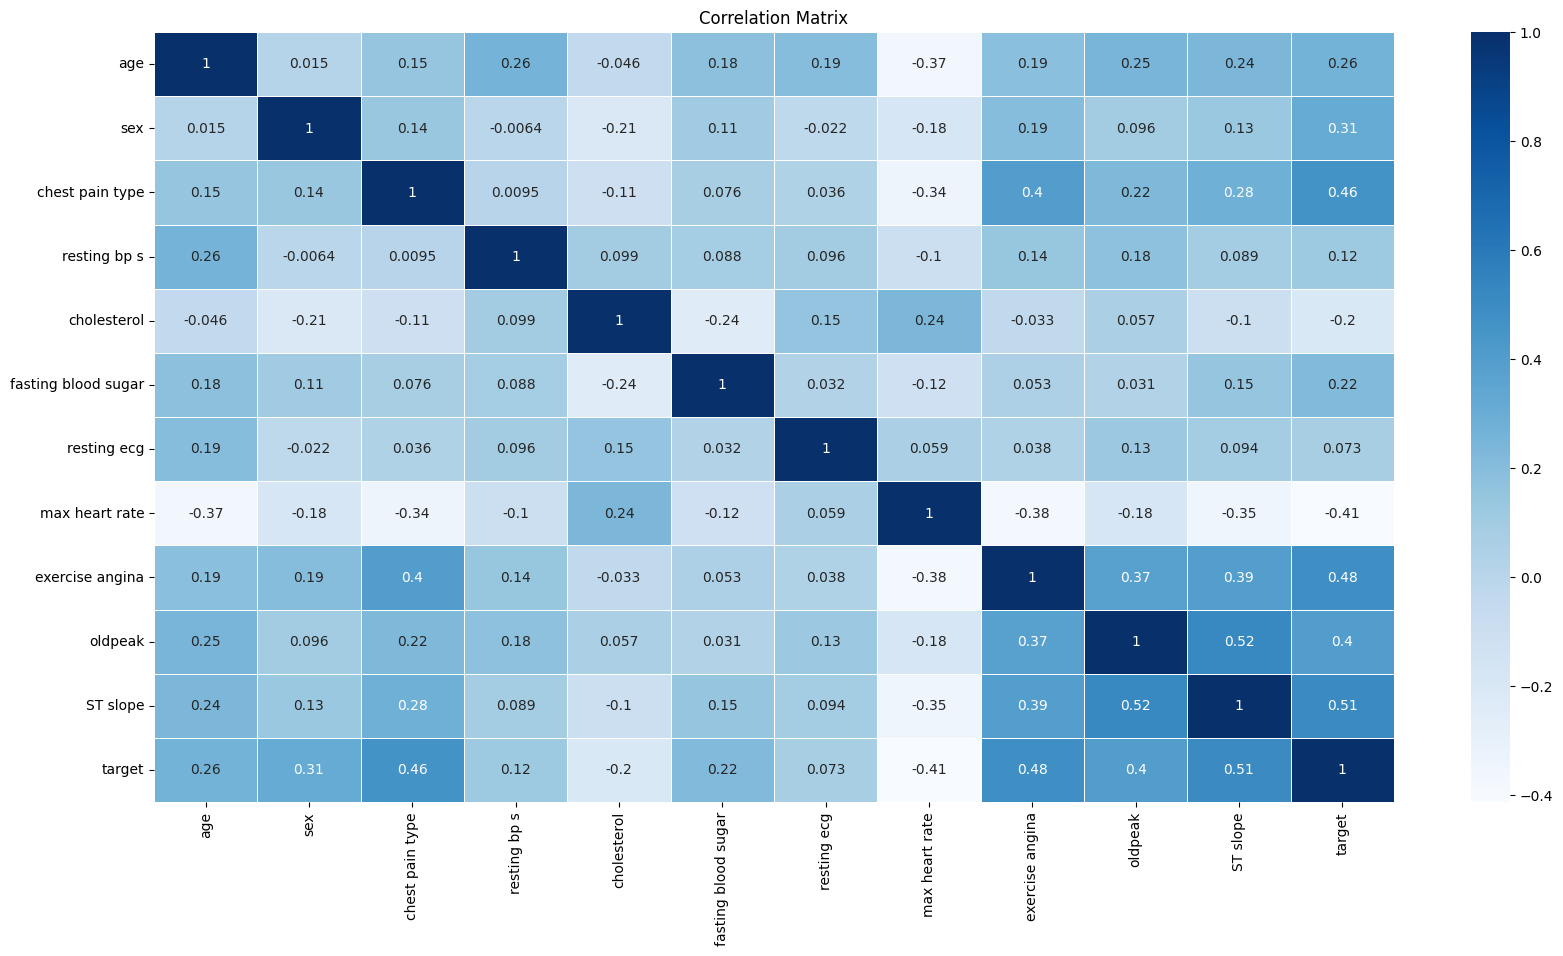

In [10]:
corr_matrix = patient_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The heatmap visualizes the correlation matrix for the heart disease dataset. Here's what can be inferred from this graph:

## Positive Correlations with the Target Variable:

1.   Chest Pain Type (0.46): There is a strong positive correlation between chest pain type and the presence of heart disease. Higher chest pain types are associated with a higher likelihood of heart disease.

2.  Exercise Induced Angina (0.48): There is a significant positive correlation between exercise-induced angina and heart disease.

3. ST Slope (0.51): The slope of the peak exercise ST segment has a strong positive correlation with heart disease. A higher ST slope is associated with a higher probability of heart disease.

4.   Max Heart Rate (-0.41): There is a significant negative correlation between maximum heart rate achieved during exercise and heart disease.

Chest Pain Type, Exercise-Induced Angina, and ST Slope: These features have strong correlations with the presence of heart disease and are crucial indicators for diagnosing heart disease.

## Setting Target

In [11]:
X_normal = patient_data.drop("target", axis=1)
Y = patient_data["target"]

## Scaling Data

In [12]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns=X_normal.columns)
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217


## Train Test Split

In [13]:
# 80% of the data will be used for training
# 20% of the data will be used for testing

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

## Model Evaluation and Testing

## 1. Logistic Regression

Logistic Regression is a statistical model and a classification algorithm that models the probability of a binary outcome (1/0, True/False, Yes/No) based on one or more predictor variables. It uses the logistic function to model the probability and makes predictions by applying a threshold to the predicted probabilities.

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy of Logistic Regression model: 85.29%

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



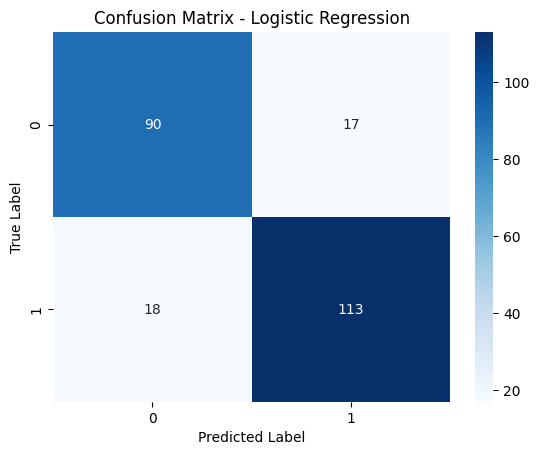

In [14]:
# Defining the parameters for Logistic Regression
logreg_param_grid = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["liblinear"]
}

logreg_model = LogisticRegression(random_state=42) # Create a Logistic Regression model

# Perform grid search with cross-validation
logreg_grid_search = GridSearchCV(
    logreg_model, logreg_param_grid, cv=5, scoring="accuracy"
)

logreg_grid_search.fit(X_train, Y_train)

# Get the best parameters
best_logreg_params = logreg_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logreg_params)

# Train a Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(random_state=42, **best_logreg_params)
best_logreg_model.fit(X_train, Y_train)

# Make predictions on the test set
logreg_predict = best_logreg_model.predict(X_test)

# Calculate accuracy on the test set
best_logreg_acc = accuracy_score(Y_test, logreg_predict)
print(
    "Best Accuracy of Logistic Regression model:",
    "{:.2f}%".format(best_logreg_acc * 100),
)

# Display classification report
print("\nClassification Report - Logistic Regression:")
lr_cr = classification_report(Y_test, logreg_predict)
print(lr_cr)

# Display confusion matrix
logreg_cm = confusion_matrix(Y_test, logreg_predict)

# Plot the confusion matrix
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 2.Decision Tree

A Decision Tree is a supervised machine learning algorithm that recursively splits the dataset into subsets based on the most significant attribute, creating a tree-like structure of decisions to predict the target variable.

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision Tree with Best Parameters: 86.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.88      0.89      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



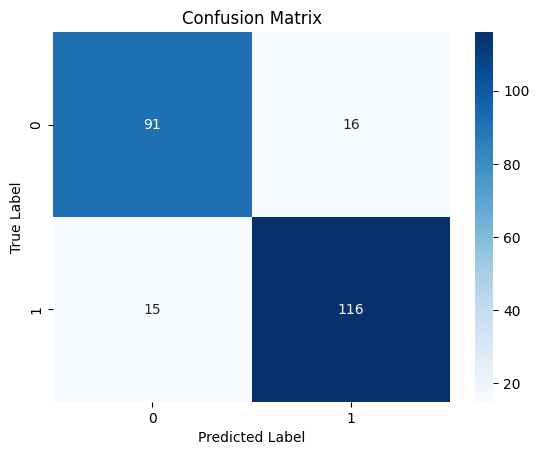

In [15]:
# Define the parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

# Create a Decision Tree model
DT = DecisionTreeClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Decision Tree with the best parameters
best_DT = DecisionTreeClassifier(random_state=0, **best_params)
best_DT.fit(X_train, Y_train)

# Make predictions on the test set
DT_predict = best_DT.predict(X_test)

# Calculate accuracy on the test set
max_dt_acc = accuracy_score(Y_test, DT_predict)
print(
    "Accuracy of Decision Tree with Best Parameters:",
    "{:.2f}%".format(max_dt_acc * 100),
)

# Display classification report
print("\nClassification Report:")
dt_cr = classification_report(Y_test, DT_predict)
print(dt_cr)

# Display confusion matrix
DT_cm = confusion_matrix(Y_test, DT_predict)

# Plot the confusion matrix
sns.heatmap(DT_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 3. Random Forrest

Random Forest is an ensemble learning algorithm for classification, regression, and other tasks that constructs a multitude of decision trees during training and outputs the mode (classification) or mean (regression) prediction of the individual trees.

Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy of Random Forest: 95.38%

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.95      0.97      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



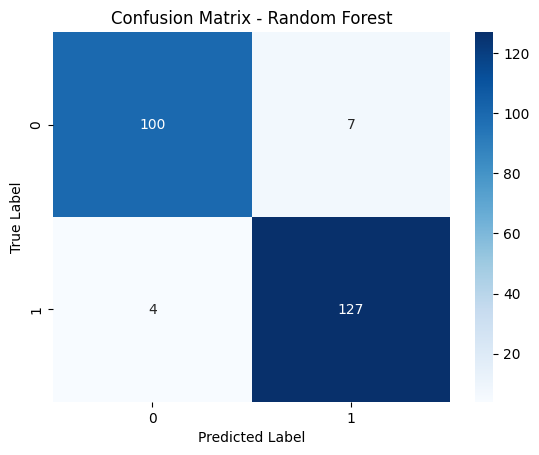

In [16]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}
# Create a Random Forest model
RF = RandomForestClassifier()

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(RF, rf_param_grid, cv=5, scoring="accuracy")
rf_grid_search.fit(X_train, Y_train)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)

# Train a Random Forest model with the best parameters
best_RF_model = RandomForestClassifier(**best_rf_params)
best_RF_model.fit(X_train, Y_train)

# Make predictions on the test set
RF_predict = best_RF_model.predict(X_test)

# Calculate accuracy on the test set
best_RF_acc = accuracy_score(Y_test, RF_predict)
print("Best Accuracy of Random Forest:", "{:.2f}%".format(best_RF_acc * 100))

# Display classification report
print("\nClassification Report - Random Forest:")
rf_cr = classification_report(Y_test, RF_predict)
print(rf_cr)

# Display confusion matrix
RF_cm = confusion_matrix(Y_test, RF_predict)

# Plot the confusion matrix
sns.heatmap(RF_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 4. KNN

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm for classification and regression that assigns a data point's label or value based on the majority class or mean of its k nearest neighbors in the feature space.

Best Hyperparameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}
Best Accuracy of K-Neighbors Classifier: 94.12%

Classification Report - K-Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.95      0.94      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



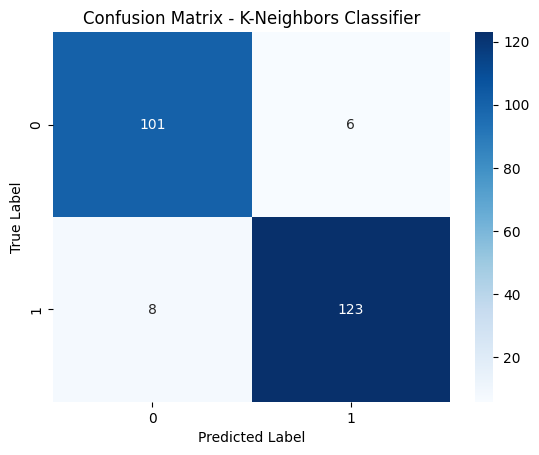

In [17]:
# Define the parameter grid for K-Nearest Neighbors
knn_param_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

# Create a K-Nearest Neighbors model
KNN = KNeighborsClassifier()

# Perform grid search with cross-validation
knn_grid_search = GridSearchCV(KNN, knn_param_grid, cv=5, scoring="accuracy")
knn_grid_search.fit(X_train, Y_train)

# Get the best parameters
best_knn_params = knn_grid_search.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_knn_params)

# Train a K-Nearest Neighbors model with the best parameters
best_KNN_model = KNeighborsClassifier(**best_knn_params)
best_KNN_model.fit(X_train, Y_train)

# Make predictions on the test set
KNN_predict = best_KNN_model.predict(X_test)

# Calculate accuracy on the test set
best_KNN_acc = accuracy_score(Y_test, KNN_predict)
print("Best Accuracy of K-Neighbors Classifier:", "{:.2f}%".format(best_KNN_acc * 100))

# Display classification report
print("\nClassification Report - K-Neighbors Classifier:")
knn_cr = classification_report(Y_test, KNN_predict)
print(knn_cr)

# Display confusion matrix
KNN_cm = confusion_matrix(Y_test, KNN_predict)

# Plot the confusion matrix
sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Neighbors Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 5. SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm for classification and regression that finds the hyperplane in an N-dimensional space that best separates the data points of different classes

Best Hyperparameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy of SVM: 89.92%

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.92      0.89      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



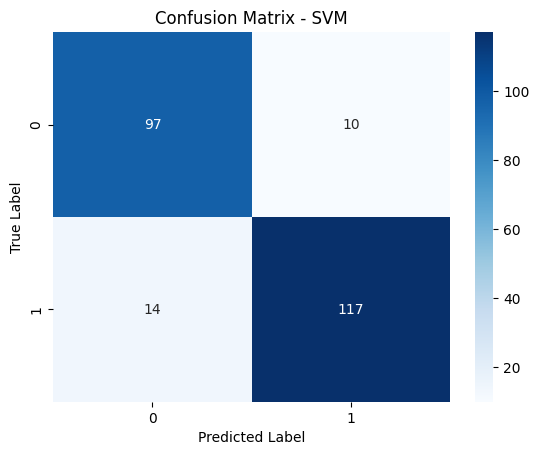

In [18]:
svm_param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
    "kernel": ["rbf"],
}

# Create an SVM model
SVM = SVC()

# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(SVM, svm_param_grid, cv=5, scoring="accuracy")
svm_grid_search.fit(X_train, Y_train)

# Get the best parameters
best_svm_params = svm_grid_search.best_params_
print("Best Hyperparameters for SVM:", best_svm_params)

# Train an SVM model with the best parameters
best_SVM_model = SVC(**best_svm_params)
best_SVM_model.fit(X_train, Y_train)

# Make predictions on the test set
SVM_predict = best_SVM_model.predict(X_test)

# Calculate accuracy on the test set
best_SVM_acc = accuracy_score(Y_test, SVM_predict)
print("Best Accuracy of SVM:", "{:.2f}%".format(best_SVM_acc * 100))

# Display classification report
print("\nClassification Report - SVM:")
svm_cr = classification_report(Y_test, SVM_predict)
print(svm_cr)

# Display confusion matrix
SVM_cm = confusion_matrix(Y_test, SVM_predict)

# Plot the confusion matrix
sns.heatmap(SVM_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Naive Bayes

Naive Bayes is a probabilistic algorithm that is based on Bayes' theorem.

Accuracy of Naive Bayes: 85.71%

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



Text(50.722222222222214, 0.5, 'True Label')

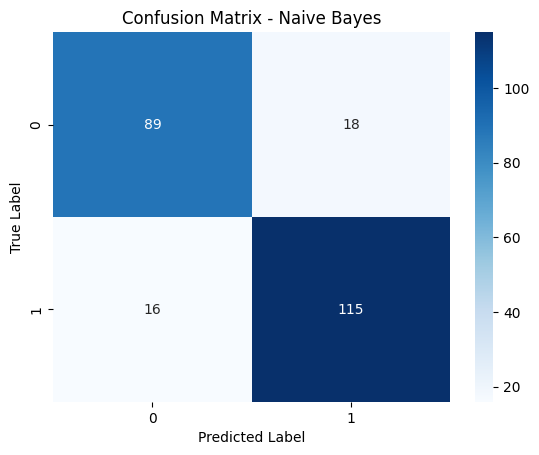

In [19]:
# Create a Naive Bayes Model
NB = GaussianNB()

NB.fit(X_train, Y_train)

# Make predictions on the test set
NB_predict = NB.predict(X_test)

# Calculate accuracy on the test set
NB_acc = accuracy_score(Y_test, NB_predict)
print("Accuracy of Naive Bayes:", "{:.2f}%".format(NB_acc * 100))

# Display classification report
print("\nClassification Report - Naive Bayes:")
nb_cr = classification_report(Y_test, NB_predict)
print(nb_cr)

# Display confusion matrix
NB_cm = confusion_matrix(Y_test, NB_predict)

# Plot the Confusion Matrix
sns.heatmap(NB_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## 7. AdaBoost

AdaBoost is an ensemble learning technique that is used for classification and regression problems. It is an iterative algorithm that combines the predictions of weak learners (typically decision trees) to create a strong classifier.

Best Hyperparameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 50, 'random_state': 42}
Best Accuracy of AdaBoost: 89.08%

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.89      0.92      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



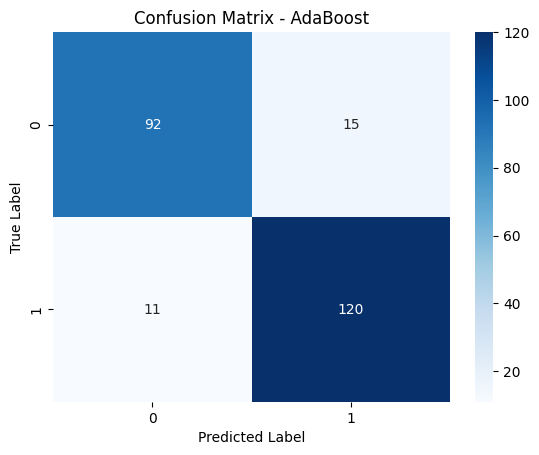

In [23]:
# Define the parameter grid for AdaBoost
ab_param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1],
    "random_state": [42],
}

# Create an AdaBoost model
adaboost_classifier = AdaBoostClassifier()

# Perform grid search with cross-validation
ab_grid_search = GridSearchCV(adaboost_classifier, ab_param_grid, cv=5, scoring="accuracy")
ab_grid_search.fit(X_train, Y_train)

# Get the best parameters
best_ab_params = ab_grid_search.best_params_
print("Best Hyperparameters for AdaBoost:", best_ab_params)

# Train an AdaBoost model with the best parameters
best_AB_model = AdaBoostClassifier(**best_ab_params)
best_AB_model.fit(X_train, Y_train)

# Make predictions on the test set
AB_predict = best_AB_model.predict(X_test)

# Calculate accuracy on the test set
best_AB_acc = accuracy_score(Y_test, AB_predict)
print("Best Accuracy of AdaBoost:", "{:.2f}%".format(best_AB_acc * 100))

# Display classification report
print("\nClassification Report - AdaBoost:")
ab_cr = classification_report(Y_test, AB_predict)
print(ab_cr)

# Display confusion matrix
adaboost_cm = confusion_matrix(Y_test, AB_predict)

# Plot the confusion matrix
sns.heatmap(adaboost_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Comparison

### 1. Comparison Table

In [38]:
models = {
    "Logistic Regression": best_logreg_model,
    "Decision Tree": best_DT,
    "Random Forest": best_RF_model,
    "K-Nearest Neighbors": best_KNN_model,
    "SVM": best_SVM_model,
    "Naive Bayes": NB,
    "AdaBoost": best_AB_model
}

models_accuracy = {
    "Logistic Regression": best_logreg_acc,
    "Decision Tree": max_dt_acc,
    "Random Forest": best_RF_acc,
    "K-Nearest Neighbors": best_KNN_acc,
    "SVM": best_SVM_acc,
    "Naive Bayes": NB_acc,
    "AdaBoost": best_AB_acc
}

accuracy_df = pd.DataFrame([(model, f"{accuracy*100:.2f}%") for model, accuracy in models_accuracy.items()], columns=["Model", "Accuracy"])
accuracy_df.head()

,Model,Accuracy
0,Logistic Regression,85.29%
1,Decision Tree,86.97%
2,Random Forest,95.38%
3,K-Nearest Neighbors,94.12%
4,SVM,89.92%


In [40]:
best_model_name = max(models_accuracy, key=models_accuracy.get)
best_model = models[best_model_name]
best_accuracy = models_accuracy[best_model_name]
print("Best Performing Model:", best_model_name)
print("Accuracy:", f"{best_accuracy*100:.2f}%")

Best Performing Model: Random Forest
Accuracy: 95.38%


### 2. Comparison Bar Chart

<ipython-input-26-039608f7a866>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(models_accuracy.keys()), y=y_values, palette=colors)
<ipython-input-26-039608f7a866>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


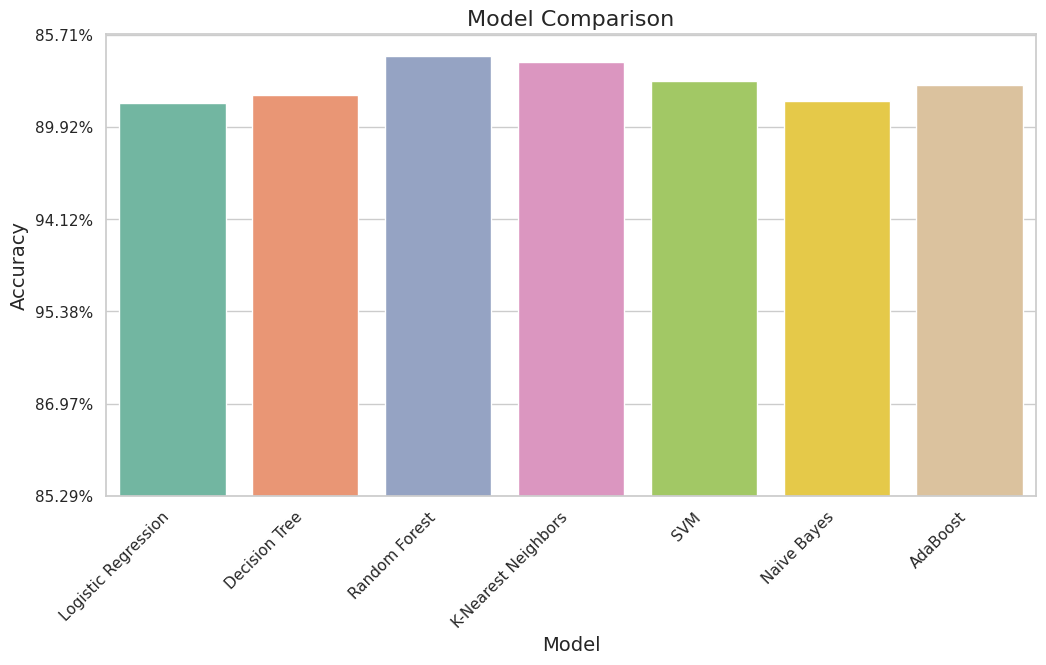

In [26]:
# Multiply values by 100 and format to 2 decimal places
y_values = [value * 100 for value in models_accuracy.values()]
y_labels = ["{:.2f}%".format(value) for value in y_values]

# Create a color palette with sufficient contrast
colors = sns.color_palette("Set2", len(models_accuracy))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=list(models_accuracy.keys()), y=y_values, palette=colors)

# Set y-axis labels
ax.set_yticklabels(y_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.title("Model Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.show()

### 3. Confusion Matrix Comparison

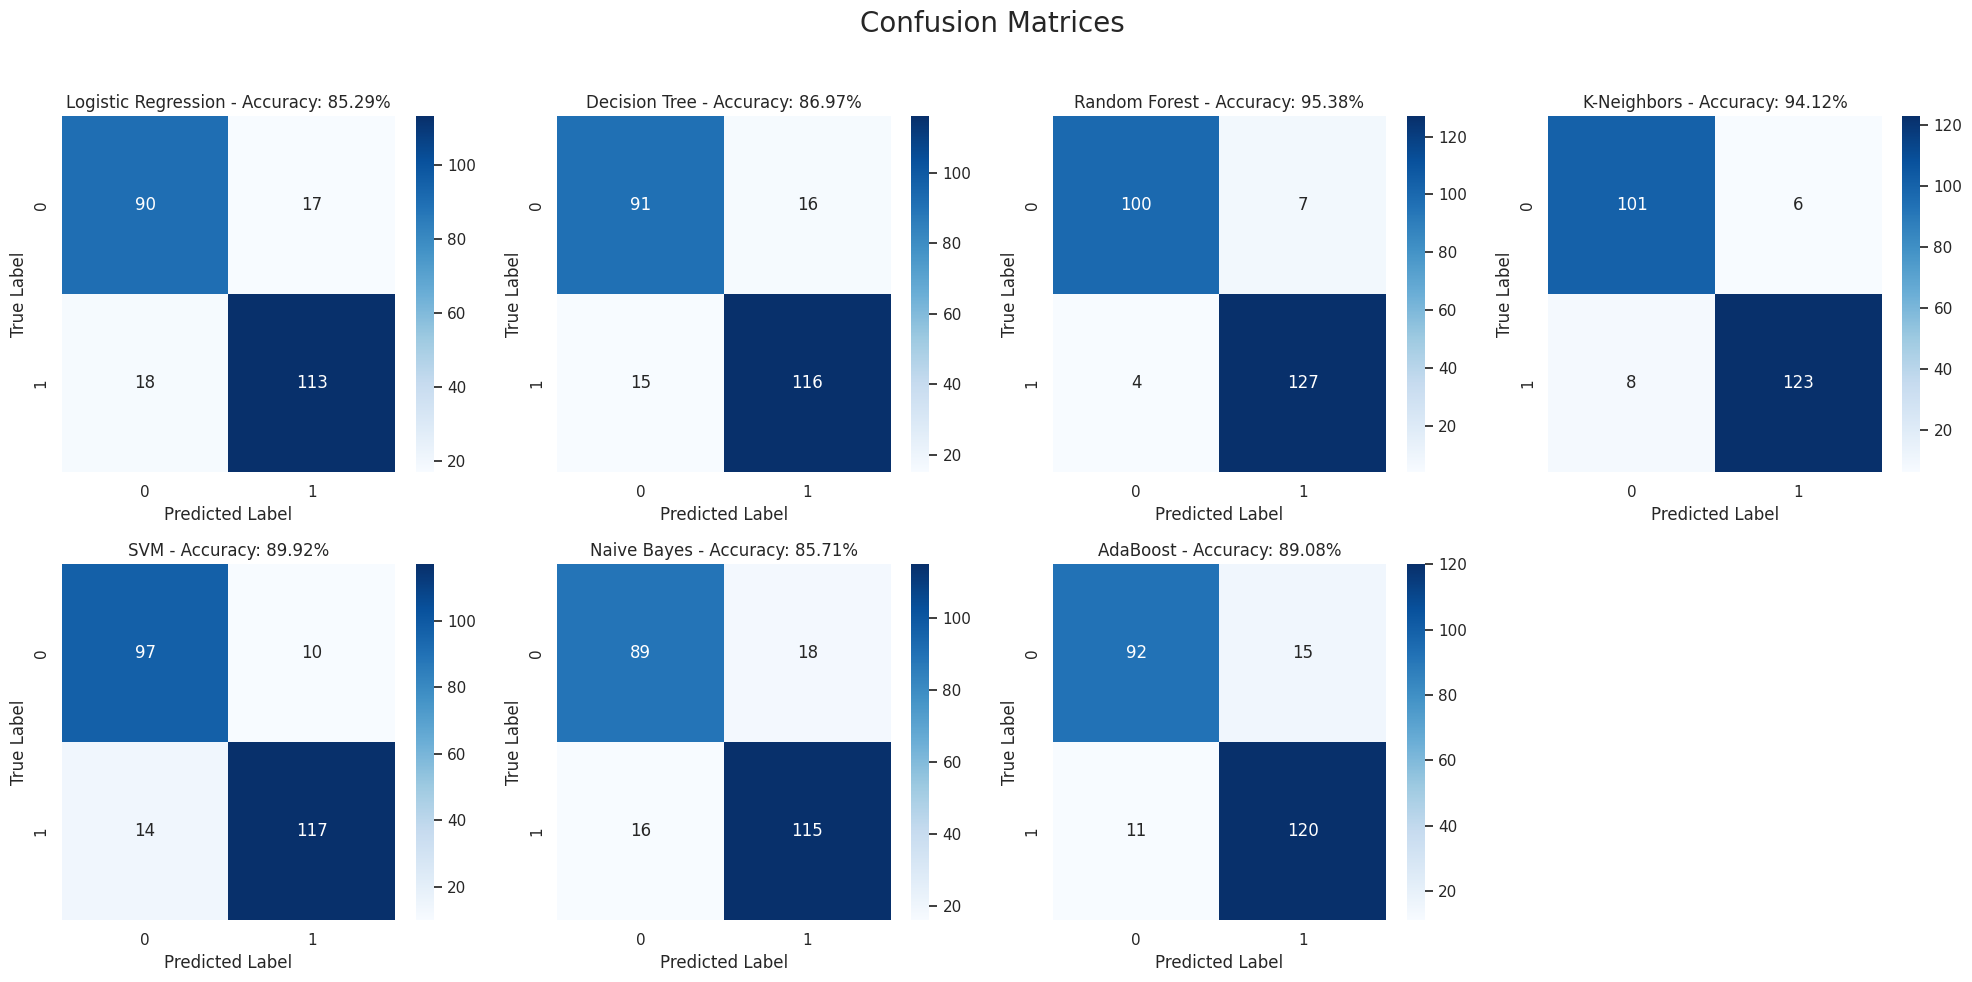

In [27]:
num_classifiers = 7
num_rows = (num_classifiers - 1) // 4 + 1
num_cols = min(num_classifiers, 4)

fig, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows)
)
fig.suptitle("Confusion Matrices", fontsize=20)

classifiers = [
    ("Logistic Regression", logreg_cm, best_logreg_acc),
    ("Decision Tree", DT_cm, max_dt_acc),
    ("Random Forest", RF_cm, best_RF_acc),
    ("K-Neighbors", KNN_cm, best_KNN_acc),
    ("SVM", SVM_cm, best_SVM_acc),
    ("Naive Bayes", NB_cm, NB_acc),
    ("AdaBoost", adaboost_cm, best_AB_acc),
]

for (name, cm, acc_score), ax in zip(classifiers, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_title(f"{name} - Accuracy: {acc_score * 100:.2f}%")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4. Classification Report Comparison Bar Plots

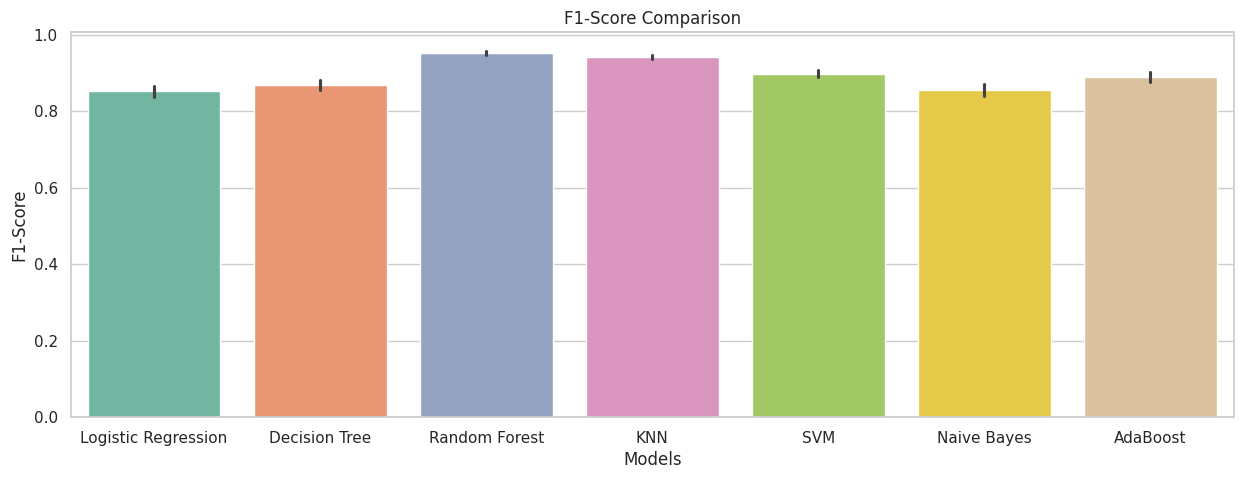

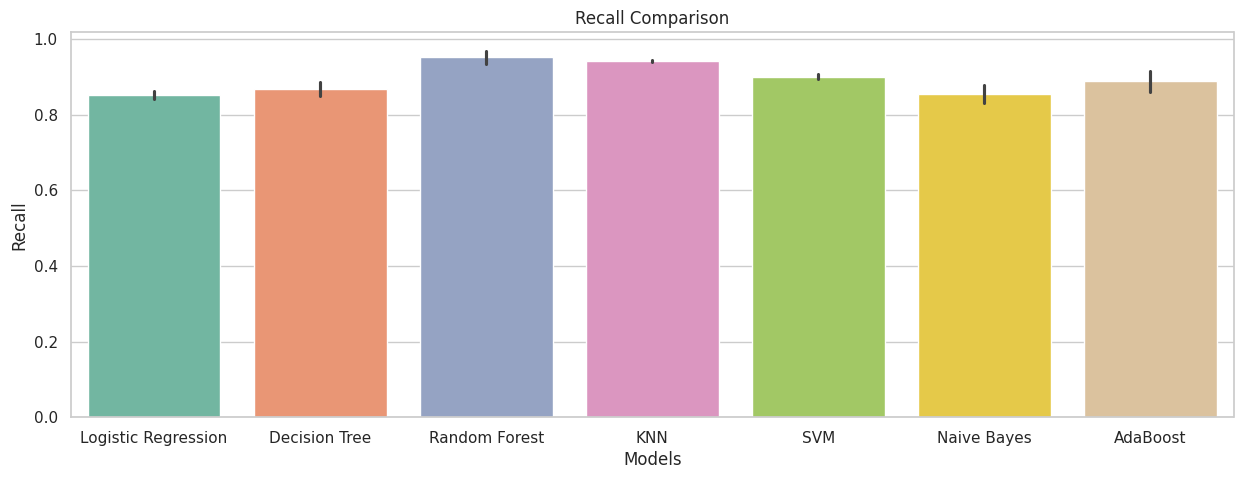

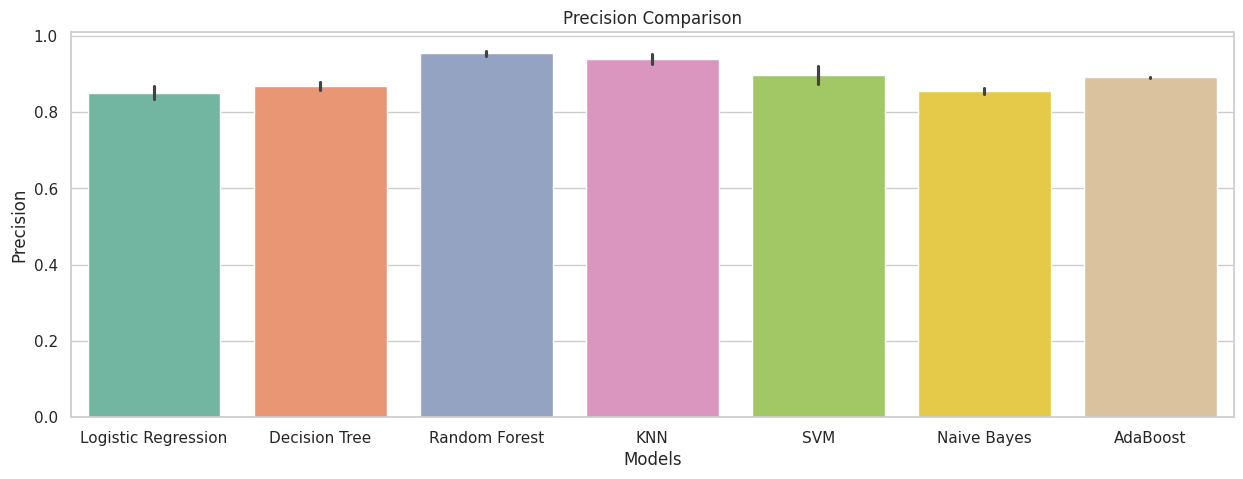

In [28]:
# Get classification reports as dictionaries
lr_cr = classification_report(Y_test, logreg_predict, output_dict=True)
dt_cr = classification_report(Y_test, DT_predict, output_dict=True)
rf_cr = classification_report(Y_test, RF_predict, output_dict=True)
knn_cr = classification_report(Y_test, KNN_predict, output_dict=True)
svm_cr = classification_report(Y_test, SVM_predict, output_dict=True)
nb_cr = classification_report(Y_test, NB_predict, output_dict=True)
ab_cr = classification_report(Y_test, AB_predict, output_dict=True)

classification_reports = [lr_cr, dt_cr, rf_cr, knn_cr, svm_cr, nb_cr, ab_cr]

f1_scores = {}
recall_scores = {}
precision_scores = {}

# Store f1-score, recall, and precision scores in lists
for name, cr in zip(
    [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "SVM",
        "Naive Bayes",
        "AdaBoost",
    ],
    classification_reports,
):
    f1_scores[name] = [
        cr[label]["f1-score"] for label in cr.keys() if label.isnumeric()
    ]
    recall_scores[name] = [
        cr[label]["recall"] for label in cr.keys() if label.isnumeric()
    ]
    precision_scores[name] = [
        cr[label]["precision"] for label in cr.keys() if label.isnumeric()
    ]

# Create pandas dataframes from the lists
df_f1 = pd.DataFrame(
    f1_scores, index=[str(i) for i in range(1, len(f1_scores["Decision Tree"]) + 1)]
)
df_recall = pd.DataFrame(
    recall_scores,
    index=[str(i) for i in range(1, len(recall_scores["Decision Tree"]) + 1)],
)
df_precision = pd.DataFrame(
    precision_scores,
    index=[str(i) for i in range(1, len(precision_scores["Decision Tree"]) + 1)],
)

# Plot accuracy comparison
plt.figure(figsize=(15, 5))
sns.barplot(data=df_f1, palette="Set2")
plt.title("F1-Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.show()

# Plot recall comparison
plt.figure(figsize=(15, 5))
sns.barplot(data=df_recall, palette="Set2")
plt.title("Recall Comparison")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.show()

# Plot precision comparison
plt.figure(figsize=(15, 5))
sns.barplot(data=df_precision, palette="Set2")
plt.title("Precision Comparison")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.show()

In [47]:
dummy_data = np.array([
    [-1.466728, 0.555995, -1.318351, 0.427328, 0.775674, -0.520929, -0.802672, 1.265039, -0.795219, -0.849792, -1.023217],
    [-0.504600, -1.798576, -0.248932, 1.516587, -0.299512, -0.520929, -0.802672, 0.637758, -0.795219, 0.071119, 0.615583],
])

# Assume best_model is already trained and available
predictions = best_model.predict(dummy_data)
res = {0: 'No', 1: 'Yes'}
for i, pred in enumerate(predictions):
    print(f"Is Some Patient {i+1} prone to Heart Disease : {res[pred]}")

Is Some Patient 1 prone to Heart Disease : No
Is Some Patient 2 prone to Heart Disease : Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The Random Forest classifier emerged as the best-performing model with an accuracy of 95.38%. The model's robustness and high accuracy make it suitable for real-world applications, such as integrating into healthcare systems for early diagnosis of heart disease.

### Future Work:
1. Deployment: Develop a web or mobile application to provide easy access for healthcare professionals and patients.

2. Feature Expansion: Incorporate additional features like genetic information and lifestyle factors to improve model accuracy.
Longitudinal Data Analysis: Use time-series data to monitor patients' health over time and predict long-term outcomes.
3. Integration with Wearables: Combine with data from wearable health devices to provide real-time monitoring and alerts.

By continuously improving and scaling this project, it can significantly contribute to early diagnosis and management of heart disease, potentially saving lives and reducing healthcare costs.